In [ ]:
Django Form Validation

Django provides built-in methods to validate form data automatically. 
Django forms submit only if it contains CSRF tokens. It uses uses a clean and easy approach to validate data.

The is_valid() method is used to perform validation for each field of the form, it is defined in Django Form class. 
It returns True if data is valid and place all data into a cleaned_data attribute.

In [ ]:
from django.db import models

# Create your models here.
class Employee(models.Model):
    empid=models.IntegerField()
    empname=models.CharField(max_length=30)
    empage=models.IntegerField()
    empcontact=models.IntegerField()
    class Meta:
        db_table='Employee'

models.py

In [ ]:
from django import forms
from myapp.models import Employee
class EmployeeForm(forms.ModelForm):
    class Meta:
        model=Employee
        fields="__all__"

forms.py create in application folder

In [ ]:
from django.contrib import admin
from django.urls import path
from myapp import views
urlpatterns = [
    path('admin/', admin.site.urls),
    path('index/',views.index)
]

urls.py

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <form method="POST" class="post-form" enctype="multipart/form-data">
        {% csrf_token %}
        {{form.as_p}}
        <button type="submit" class="save btn btn-default">Save</button>
    </form>
</body>
</html>

index.html

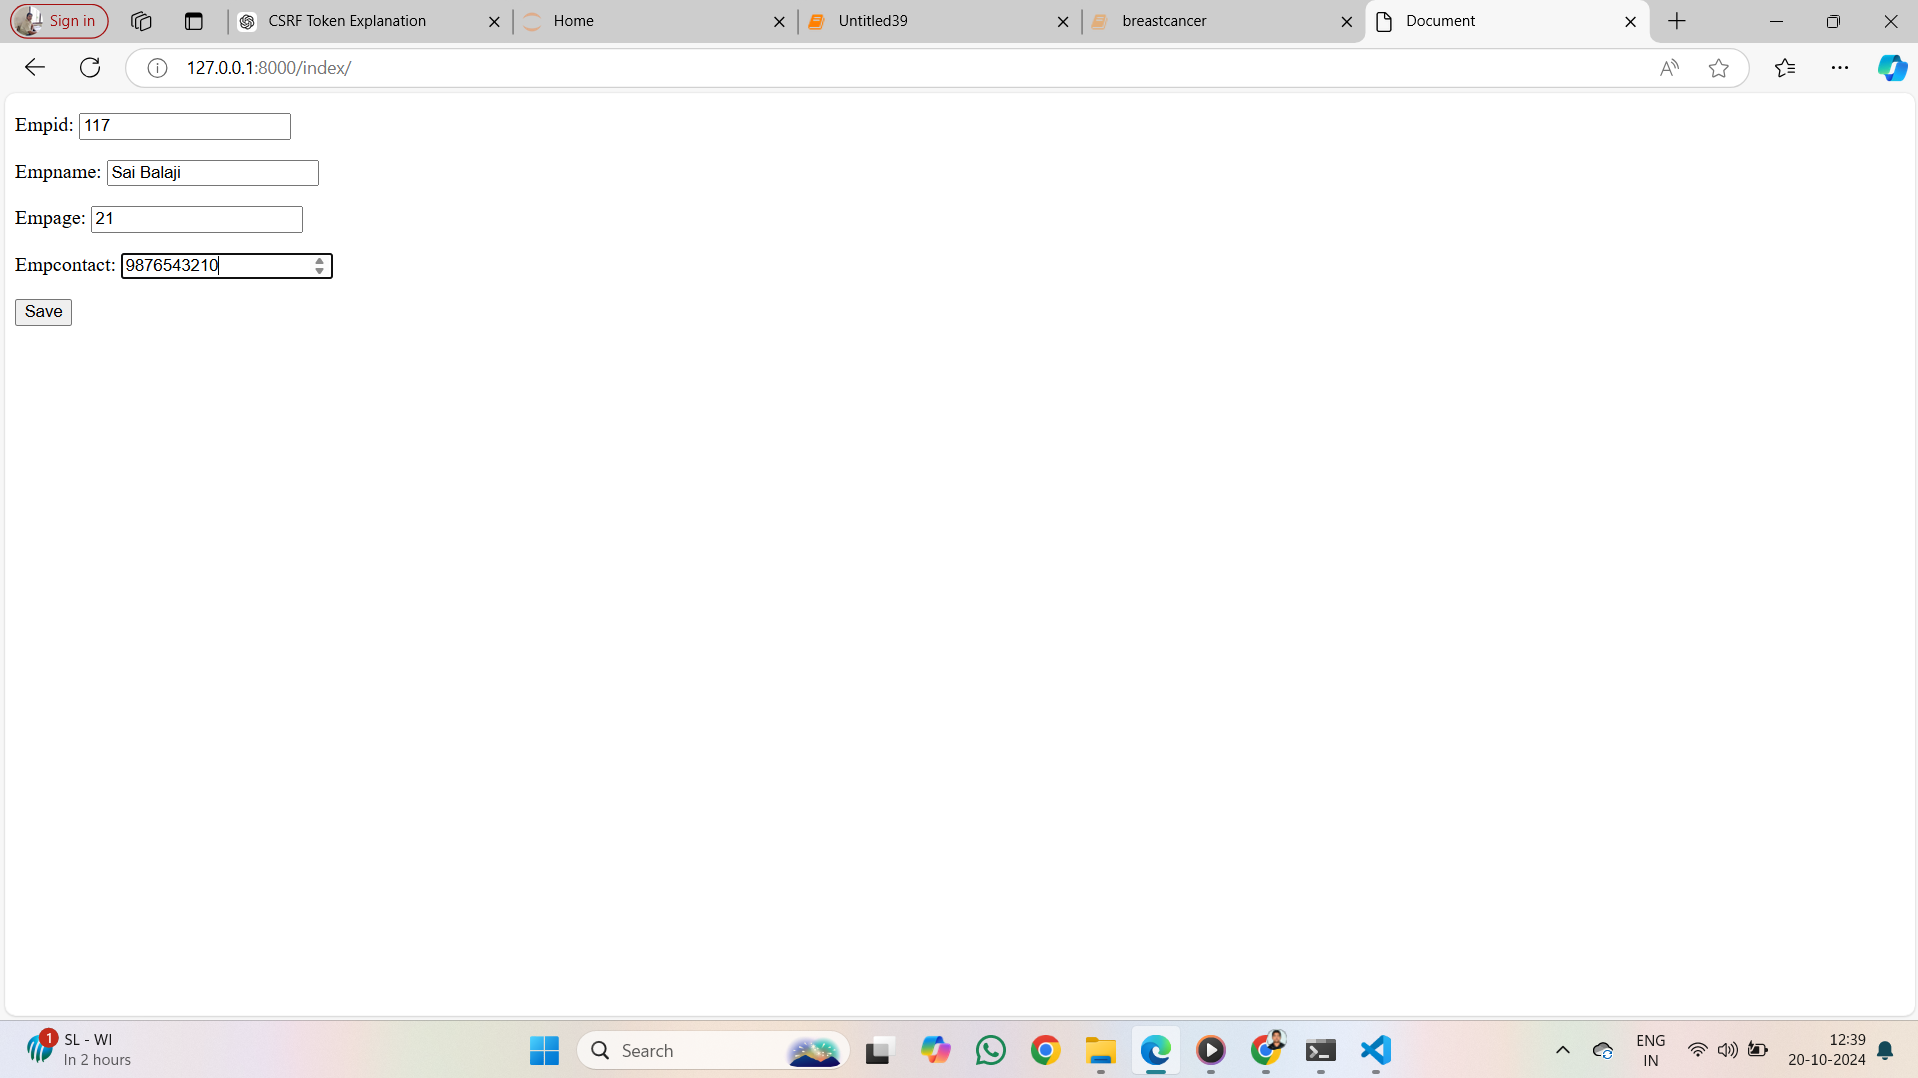

In [1]:
from IPython.display import Image,display
a=r"C:\Users\DELL\OneDrive\Pictures\Screenshot 2024-09-17 194325.png"
display(Image(filename=a))

In [ ]:
Django File Upload

File upload to the server using Django is a very easy task. Django provides built-in library and methods that help to upload a file to the server.

The forms.FileField() method is used to create a file input and submit the file to the server. 
While working with files, make sure the HTML form tag contains enctype="multipart/form-data" property.

In [ ]:
from django import forms

class EmployeeForm(forms.Form):
    fname = forms.CharField(label="Enter First Name", max_length=30)
    lname = forms.CharField(label="Enter Last Name", max_length=30)
    age = forms.IntegerField(label="Enter your Age")
    phone_number = forms.IntegerField(label="Enter Your Phone Number")
    file = forms.FileField(required=True)

forms.py

In [ ]:
from django.shortcuts import render
from django.http import HttpResponse
from myapp.functions.functions import handle_uploaded_file
from myapp.forms import EmployeeForm

def index(request):
    if request.method == "POST":
        form = EmployeeForm(request.POST, request.FILES)
        if form.is_valid():
            handle_uploaded_file(request.FILES['file'])
            return HttpResponse("File Uploaded Successfully")
    else:
        form = EmployeeForm()
    return render(request, 'index.html', {'form': form})
views.py

In [ ]:
import os

def handle_uploaded_file(f):
    upload_dir = 'myapp/static/upload/'
    if not os.path.exists(upload_dir):
        os.makedirs(upload_dir)
    with open(upload_dir + f.name, 'wb+') as destination:
        for chunk in f.chunks():
            destination.write(chunk)


save in functions.py
create functions folder in app folder. then create two python files they are __init__.py and functions.py

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <form method="POST" class="post-form" enctype="multipart/form-data">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit" class="save btn btn-default">Submit</button>
    </form>
</body>
</html>

index.html

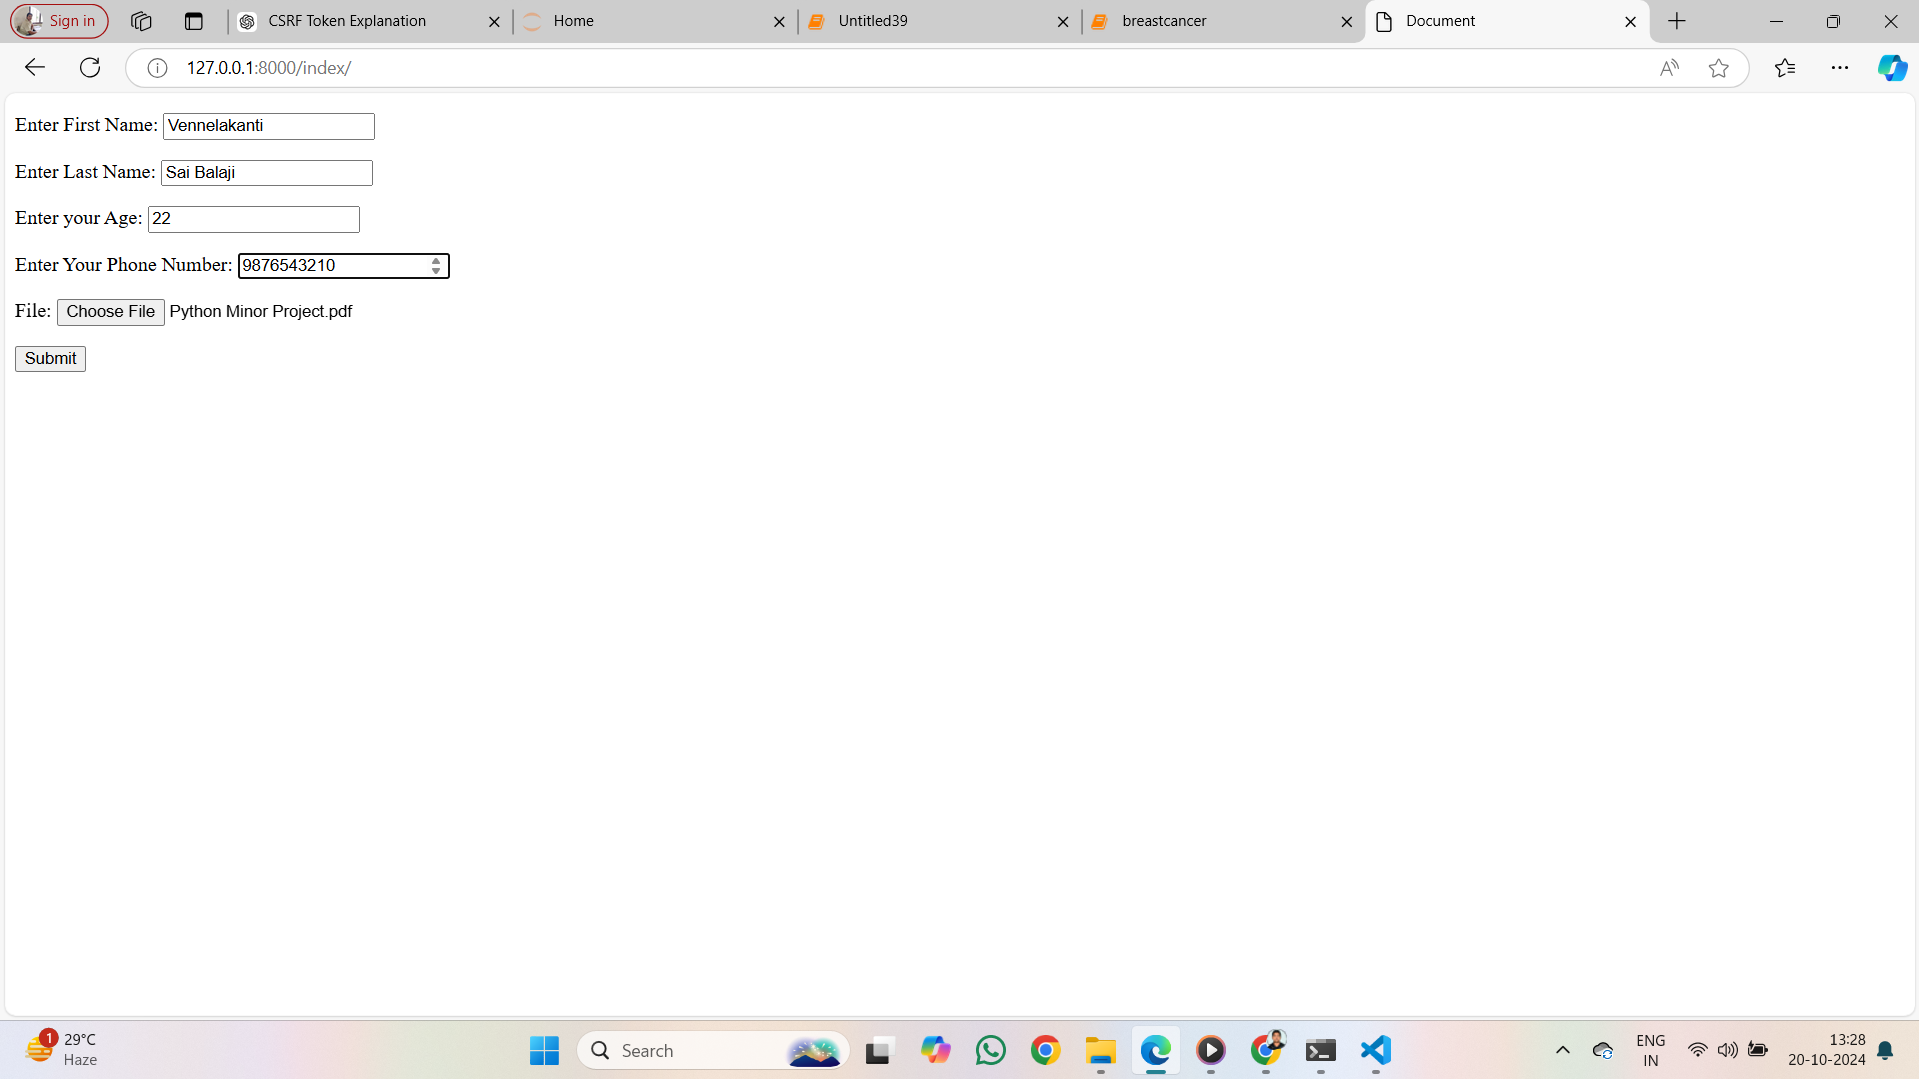


After Clicking Submit



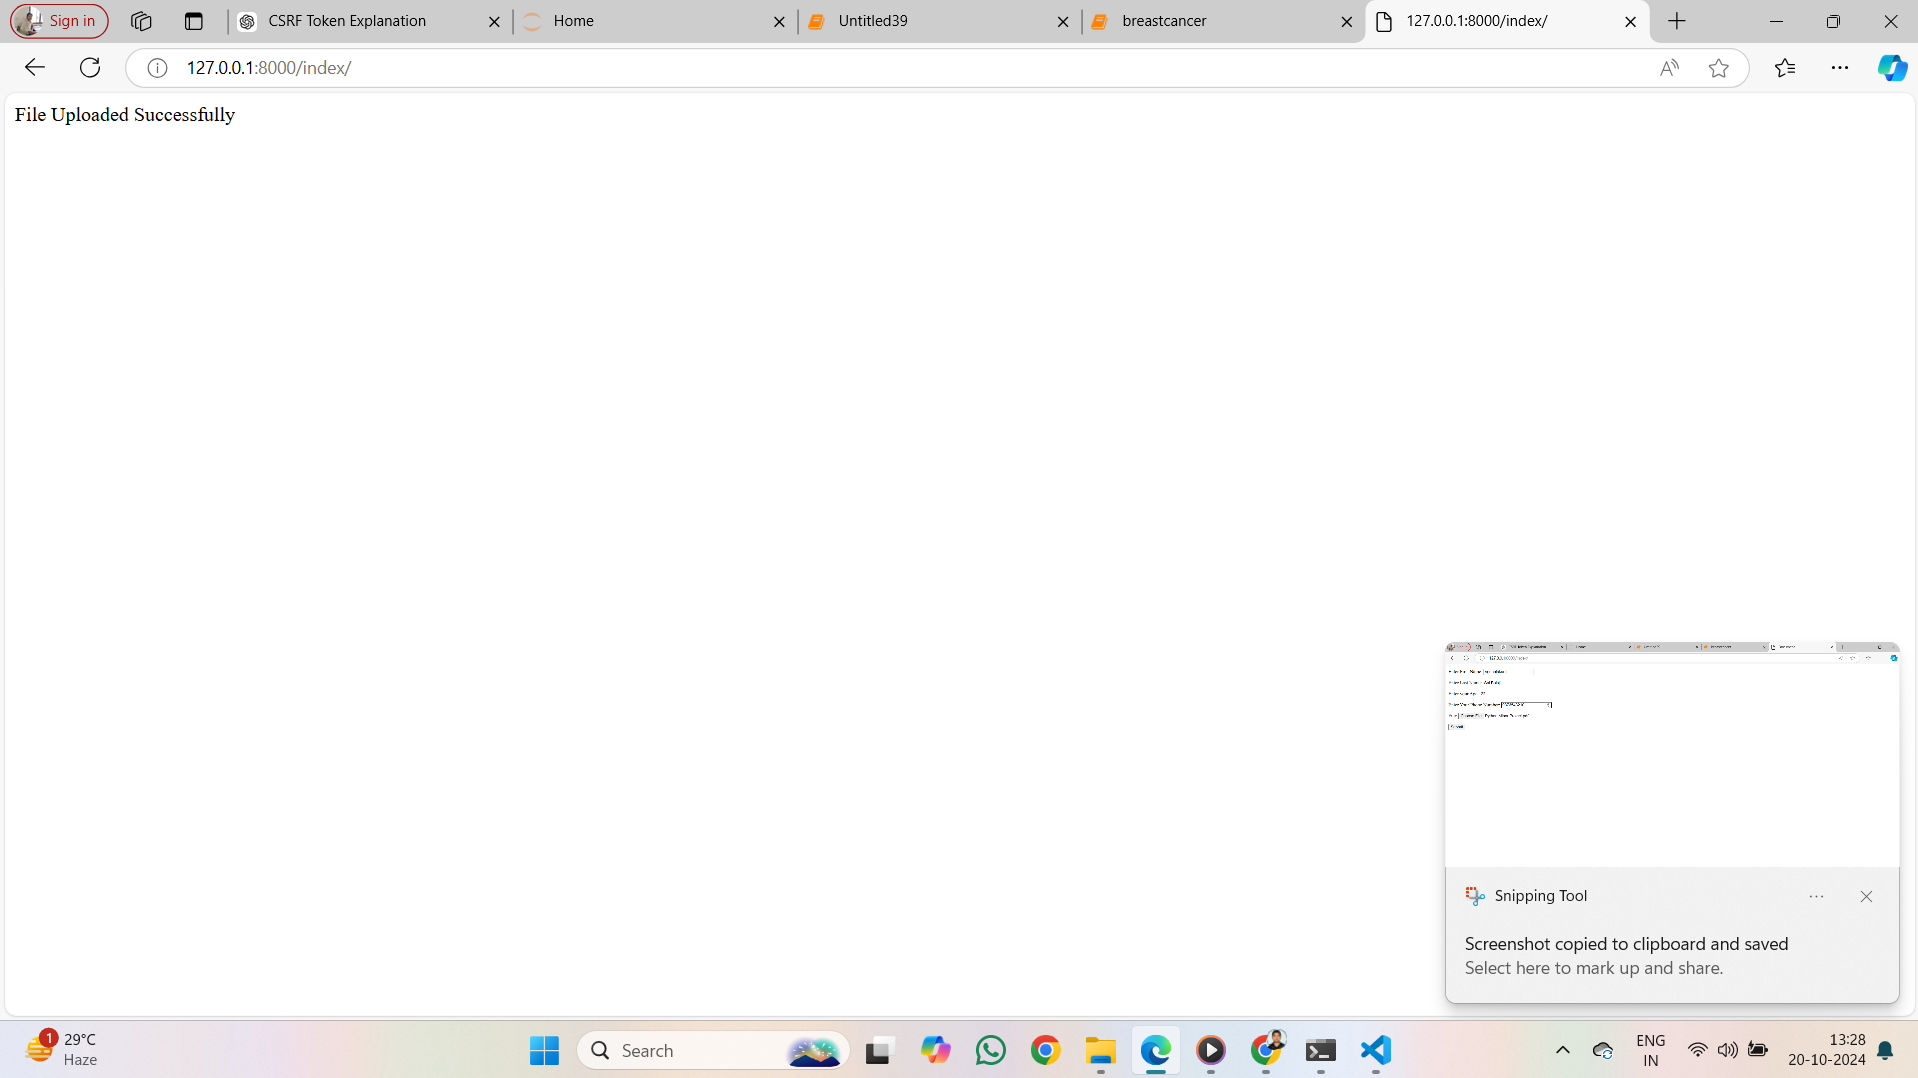

In [6]:
from IPython.display import Image,display
a=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-10-20 132836.png"
b=r"C:\Users\DELL\OneDrive\Pictures\Screenshots\Screenshot 2024-10-20 132846.png"
display(Image(filename=a))
print("\nAfter Clicking Submit\n")
display(Image(filename=b))